### 1. 환경 설정

##### ◾uv 패키지 설치
- Python 개발 환경에서 더욱 편리한 패키지 관리를 제공하는 도구로, 고속성, 크로스 플랫폼 지원, 전용 인터페이스 등 다양한 장점
- 특히, Rust로 구현되어 있어 매우 빠른 동작을 자랑
- 설치 명령어
  ```bash
  # On macOS and Linux.
  curl -LsSf https://astral.sh/uv/install.sh | sh

  # On Windows.
  powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"
  ```

##### ◾프로젝트 생성
```bash
# 'project-name'으로 프로젝트 생성
uv init [project-name]

# 의존성 추가 : MCP 의존성 추가
uv add "mcp[cli]"
--
# Specify a version constraint
uv add 'requests==2.31.0'

# Add a git dependency
uv add git+https://github.com/psf/requests
--
```

##### ◾MCP 실행
```bash
# uv를 사용해 server.py 클로드에 추가!
uv run mcp install server.py
```


- Test용 server.py

In [ ]:
# server.py
from mcp.server.fastmcp import FastMCP

# Create an MCP server
mcp = FastMCP("Demo")


# Add an addition tool
@mcp.tool()
def add(a: int, b: int) -> int:
    """Add two numbers"""
    return a + b


# Add a dynamic greeting resource
@mcp.resource("greeting://{name}")
def get_greeting(name: str) -> str:
    """Get a personalized greeting"""
    return f"Hello, {name}!"

- 명령어를 사용하여 클로드에 서버 등록!</br>
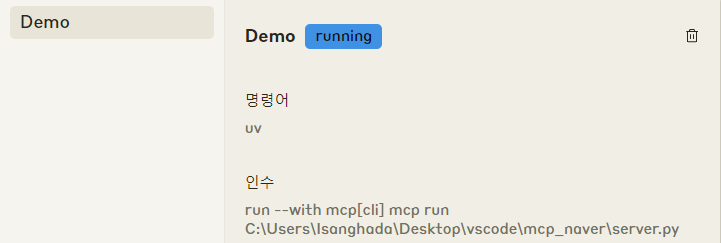
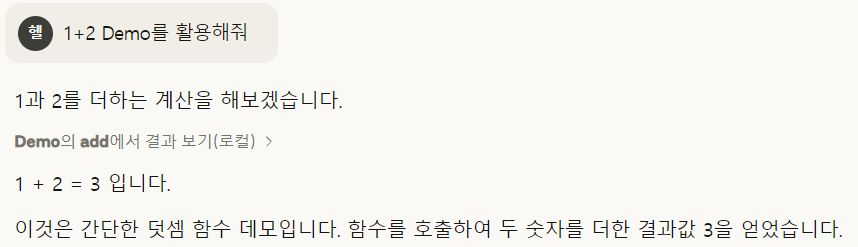

### 2. MCP 프로토콜

##### ◾Model Context Protocol(MCP)
- MCP는 "대규모 언어 모델이 외부 데이터와 시스템을 더 효과적으로 활용할 수 있도록 설계된 일종의 연결 프로토콜"입니다. 앤트로픽은 MCP를 USB-C 포트에 비유합니다. USB-C가 다양한 기기와 주변 장치를 표준화된 방식으로 연결하듯이, MCP는 AI 모델이 다양한 데이터 소스와 도구에 표준화된 방식으로 연결될 수 있게 해줍니다.

##### ◾MCP 특징
- 개방형 표준(Open Standard): MCP는 오픈소스로 공개되어 있어 누구나 자유롭게 사용하고 개선할 수 있습니다. 앤트로픽이 개발했지만 Claude와 같은 그들의 모델에만 국한되지 않고, 어떤 AI 시스템에서도 사용할 수 있습니다.
- 양방향 연결(Two-way Connection): MCP는 AI 모델과 데이터 소스 간의 양방향 통신을 지원합니다. 기존 API 호출 방식에서는 AI가 데이터를 요청하면 서버가 한 번 응답하고 끝나는 방식이었지만, MCP에서는 AI 모델과 데이터 소스가 지속적으로 연결된 상태에서 서로 정보를 주고받을 수 있습니다.
- 범용성과 표준화(Universality and Standardization): MCP는 다양한 데이터 소스와 도구를 하나의 표준 프로토콜로 연결할 수 있게 해줍니다. 개발자는 각 데이터 소스마다 별도의 커넥터를 유지할 필요 없이 단일 프로토콜을 통해 연결할 수 있습니다.
- 보안 및 신뢰성(Security and Reliability): MCP는 AI 모델과 데이터 소스 간의 안전하고 신뢰할 수 있는 연결을 제공합니다. 이를 통해 개인 정보 보호와 데이터 무결성을 유지할 수 있습니다.

##### ◾일반 아키텍처
MCP의 핵심은 호스트 애플리케이션이 여러 서버에 연결할 수 있는 클라이언트-서버 아키텍처를 따릅니다:</br>
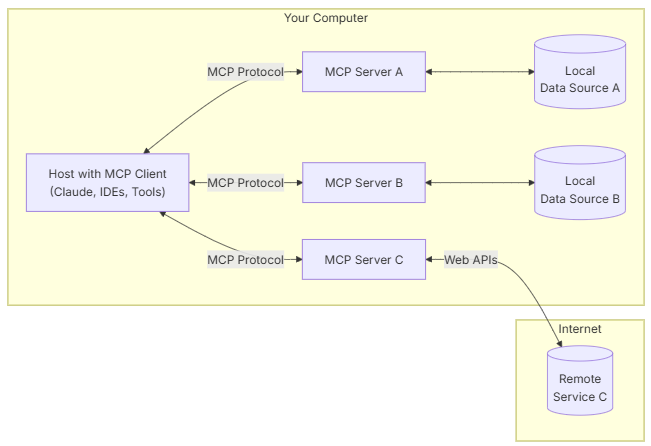
- MCP 호스트: MCP를 통해 데이터에 액세스하려는 클로드 데스크톱, IDE 또는 AI 도구와 같은 프로그램
- MCP 클라이언트: 서버와 1:1 연결을 유지하는 프로토콜 클라이언트
- MCP 서버: 표준화된 모델 컨텍스트 프로토콜을 통해 각각 특정 기능을 노출하는 경량 프로그램
- 로컬 데이터 소스: MCP 서버가 안전하게 액세스할 수 있는 컴퓨터의 파일, 데이터베이스 및 서비스
- 원격 서비스: MCP 서버가 연결할 수 있는 외부 시스템(예: API를 통해)

##### ◾핵심 개념
1. 서버(Server): FastMCP 서버는 MCP 프로토콜의 핵심 인터페이스로, 연결 관리, 프로토콜 준수, 메시지 라우팅 등을 처리합니다. 이를 통해 개발자는 MCP 서버를 구축하여 데이터를 노출하거나 도구를 제공할 수 있습니다. ​
2. 리소스(Resources): 리소스는 LLM에 데이터를 제공하는 방식으로, REST API의 GET 엔드포인트와 유사합니다. 주로 데이터를 제공하며, 큰 연산을 수행하거나 부작용을 일으키지 않아야 합니다. ​
3. 도구(Tools): 도구는 LLM이 서버를 통해 액션을 수행할 수 있도록 합니다. 리소스와 달리, 도구는 연산을 수행하고 부작용을 가질 수 있습니다. ​
4. 프롬프트(Prompts): 프롬프트는 LLM이 서버와 효과적으로 상호 작용할 수 있도록 돕는 재사용 가능한 템플릿입니다. 이를 통해 일관된 상호 작용 패턴을 정의할 수 있습니다. ​
5. 이미지(Images): FastMCP는 이미지 데이터를 자동으로 처리하는 Image 클래스를 제공합니다. 이를 통해 이미지 데이터를 효율적으로 관리하고 활용할 수 있습니다. ​
6. 컨텍스트(Context): 컨텍스트 객체는 도구와 리소스가 MCP의 다양한 기능에 접근할 수 있도록 합니다. 이를 통해 요청의 맥락을 이해하고 적절한 처리를 수행할 수 있습니다. ​

In [ ]:
from mcp.server.fastmcp import FastMCP, Image, Context
from PIL import Image as PILImage

# Create a named server
mcp = FastMCP("My App")
# Specify dependencies for deployment and development
mcp = FastMCP("My App", dependencies=["pandas", "numpy"])

# Resource
@mcp.resource("config://app")
def get_config() -> str:
  """Static configuration data"""
  return "App configuration here"

# Tool
@mcp.tool()
def calculate_bmi(weight_kg: float, height_m: float) -> float:
    """Calculate BMI given weight in kg and height in meters"""
    return weight_kg / (height_m**2)

# Prompt
@mcp.prompt()
def review_code(code: str) -> str:
    return f"Please review this code:\n\n{code}"

# Image
@mcp.tool()
def create_thumbnail(image_path: str) -> Image:
    """Create a thumbnail from an image"""
    img = PILImage.open(image_path)
    img.thumbnail((100, 100))
    return Image(data=img.tobytes(), format="png")

# Context
@mcp.tool()
async def long_task(files: list[str], ctx: Context) -> str:
    """Process multiple files with progress tracking"""
    for i, file in enumerate(files):
        ctx.info(f"Processing {file}")
        await ctx.report_progress(i, len(files))
        data, mime_type = await ctx.read_resource(f"file://{file}")
    return "Processing complete"

### 3. Naver Open API

##### ◾

### 4. Naver Open API

##### ◾

### 5. temp

##### ◾